In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [2]:
# Hyper Parameters 
input_size = 784
hidden_size = 200
num_epochs = 10
batch_size = 100
learning_rate = 0.0001

In [3]:
# MNIST Dataset 
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

Files already downloaded


In [4]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [5]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, input_size)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

net = Net(input_size, hidden_size)

In [6]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  

In [7]:
# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28*28))
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch [1/10], Step [100/600], Loss: 0.0562
Epoch [1/10], Step [200/600], Loss: 0.0443
Epoch [1/10], Step [300/600], Loss: 0.0328
Epoch [1/10], Step [400/600], Loss: 0.0299
Epoch [1/10], Step [500/600], Loss: 0.0229
Epoch [1/10], Step [600/600], Loss: 0.0214
Epoch [2/10], Step [100/600], Loss: 0.0187
Epoch [2/10], Step [200/600], Loss: 0.0177
Epoch [2/10], Step [300/600], Loss: 0.0154
Epoch [2/10], Step [400/600], Loss: 0.0151
Epoch [2/10], Step [500/600], Loss: 0.0136
Epoch [2/10], Step [600/600], Loss: 0.0126
Epoch [3/10], Step [100/600], Loss: 0.0123
Epoch [3/10], Step [200/600], Loss: 0.0117
Epoch [3/10], Step [300/600], Loss: 0.0104
Epoch [3/10], Step [400/600], Loss: 0.0110
Epoch [3/10], Step [500/600], Loss: 0.0094
Epoch [3/10], Step [600/600], Loss: 0.0099
Epoch [4/10], Step [100/600], Loss: 0.0093
Epoch [4/10], Step [200/600], Loss: 0.0096
Epoch [4/10], Step [300/600], Loss: 0.0084
Epoch [4/10], Step [400/600], Loss: 0.0082
Epoch [4/10], Step [500/600], Loss: 0.0082
Epoch [4/10

In [8]:
a, _ = test_dataset[110]

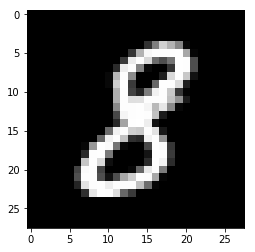

In [9]:
plt.imshow(a.numpy().reshape(28, 28), cmap='gray')

In [10]:
a1 = net(Variable(a.view(-1, 28*28)))

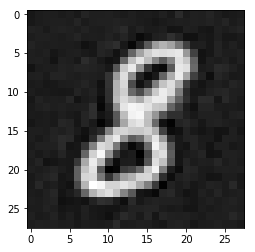

In [11]:
plt.imshow(a1.data.numpy().reshape(28, 28), cmap='gray');